In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("BlinkIT Grocery csv.csv")

In [6]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
print(df.shape)

(8523, 12)


In [9]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [10]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [11]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
df["Item Fat Content"]=df["Item Fat Content"].replace({"LF": "low Fat",
                                                       "low fat":"low Fat",
                                                       "reg":"Regular"})

In [13]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low Fat'], dtype=object)

In [24]:
df["Item Fat Content"]=df["Item Fat Content"].replace({"low Fat":"Low Fat"})

In [26]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [28]:
Total_sales=df["Sales"].sum()

In [30]:
Aveage=df["Sales"].mean()

In [32]:
no_of_item_sold=df["Sales"].count()

In [34]:
Aveage_ratings=df["Rating"].mean()

In [36]:
print(f"Total_sales : ${Total_sales}")
print(f"Average : {Aveage}") 
print(f"no_of_item_sold : {no_of_item_sold}")
print(f"Average_ratings : {Aveage_ratings}")

Total_sales : $1201681.4928
Average : 140.99278338613163
no_of_item_sold : 8523
Average_ratings : 3.965857092573038


In [38]:
sales_fat_content=df.groupby("Item Fat Content")["Sales"].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

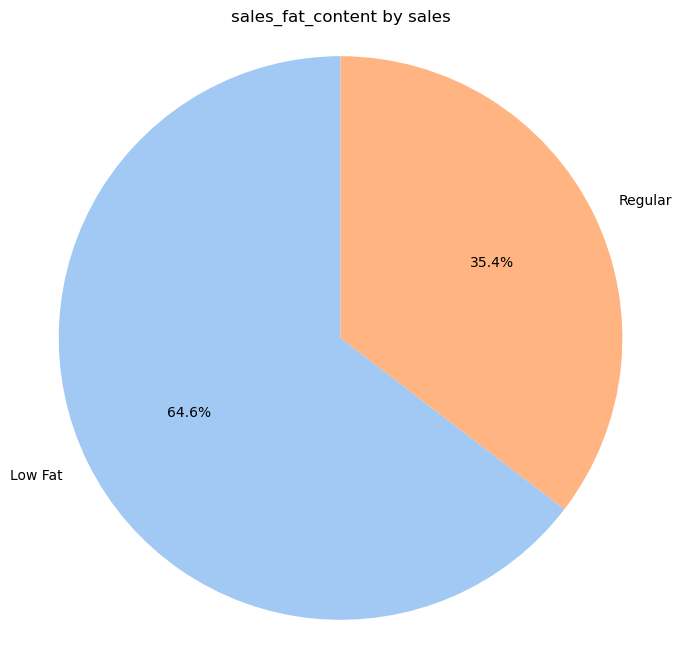

In [60]:
plt.figure(figsize=(8,8))
plt.pie(sales_fat_content, labels=sales_fat_content.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Categories')
plt.axis('equal') # Ensures the pie chart is circular
   
plt.title("sales_fat_content by sales")
plt.show

In [64]:
sales_by_type=df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)

In [66]:
sales_by_type

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9224
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4616
Canned                    90706.7290
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1670
Breads                    35379.1198
Hard Drinks               29334.6806
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

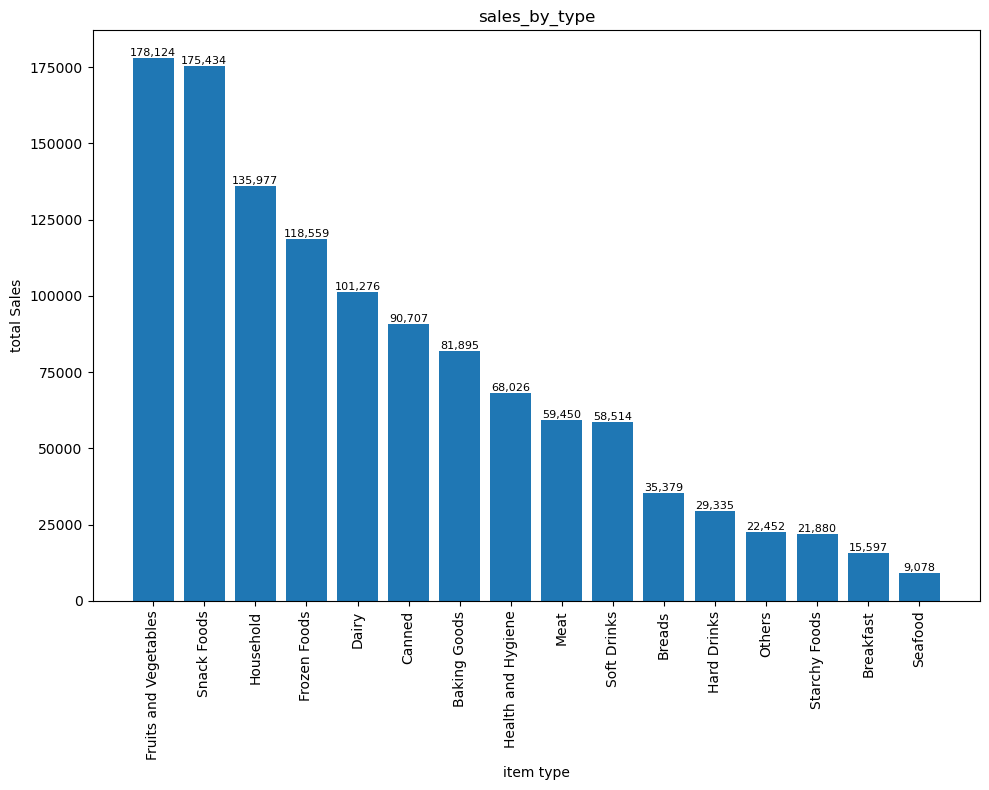

In [112]:
plt.figure(figsize=(10,8))
bars=plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=90)
plt.title("sales_by_type")
plt.xlabel("item type")
plt.ylabel("total Sales")
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
        f"{bar.get_height():,.0f}", ha="center", va="bottom",fontsize=8)
plt.tight_layout()
plt.show()

In [126]:
grouped=df.groupby(["Outlet Location Type","Item Fat Content"])["Sales"].sum().unstack()
grouped=grouped[["Low Fat","Regular"]]
grouped


Item Fat Content,Low Fat,Regular
Outlet Location Type,,
Tier 1,215047.9126,121349.8994
Tier 2,254464.7794,138685.8682
Tier 3,306806.9964,165326.0368


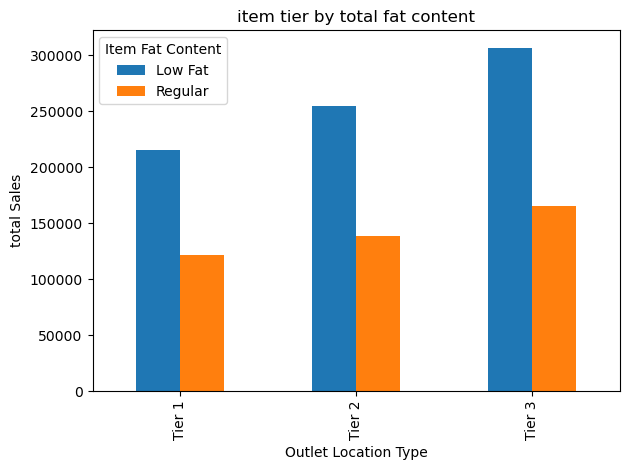

In [134]:
ax=grouped.plot(kind="bar", title="item tier by total fat content")
plt.xlabel("Outlet Location Type")
plt.ylabel("total Sales")
plt.legend(title="Item Fat Content")
plt.tight_layout()
plt.show()

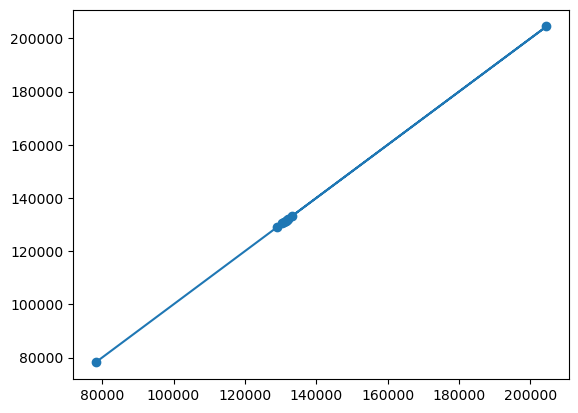

In [146]:
sales_by_year=df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()
sales_by_year

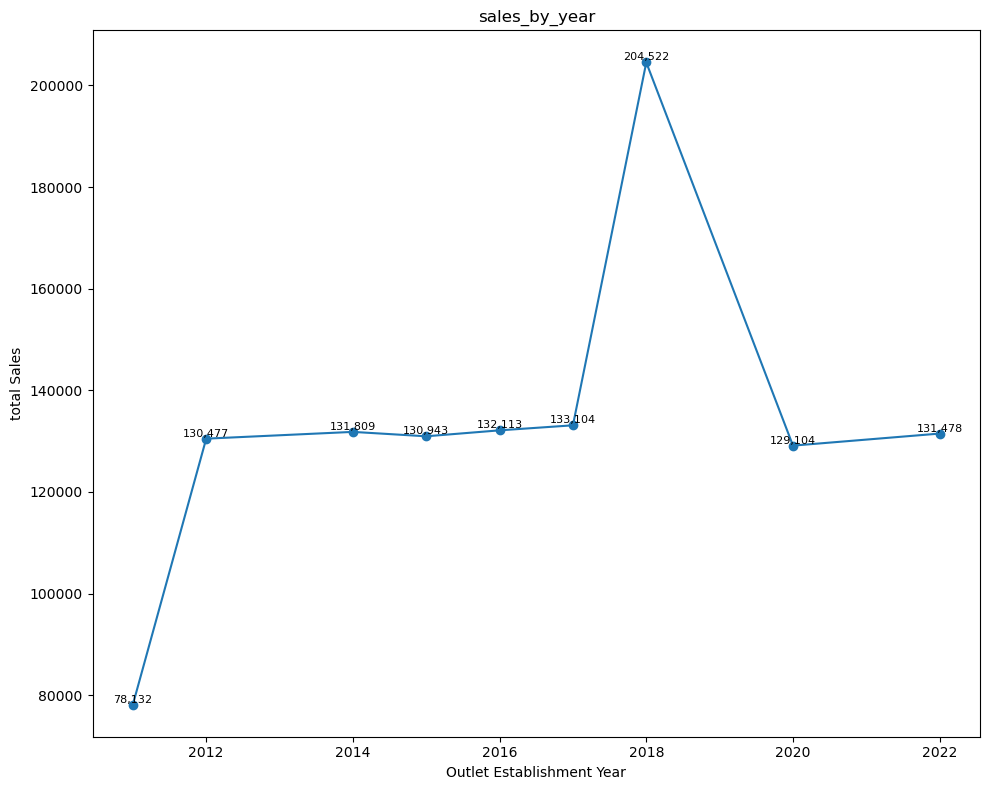

In [150]:
plt.figure(figsize=(10,8))
plt.plot(sales_by_year.index,sales_by_year.values,marker="o", linestyle="-")
plt.title("sales_by_year")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("total Sales")
for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f"{y:,.0f}", ha="center", va="bottom",fontsize=8)
plt.tight_layout()
plt.show()

In [158]:
sales_by_size=df.groupby("Outlet Size")["Sales"].sum()
sales_by_size

Outlet Size
High      248991.5860
Medium    507895.7364
Small     444794.1704
Name: Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

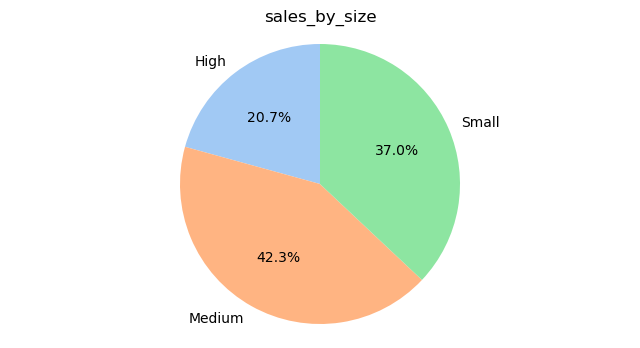

In [162]:
plt.figure(figsize=(8,4))
plt.pie(sales_by_size, labels=sales_by_size.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('sales_by_size')
plt.axis('equal') # Ensures the pie chart is circular
   
plt.title("sales_by_size")
plt.show


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [184]:
sales_by_location=df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location=sales_by_location.sort_values("Sales", ascending=False)

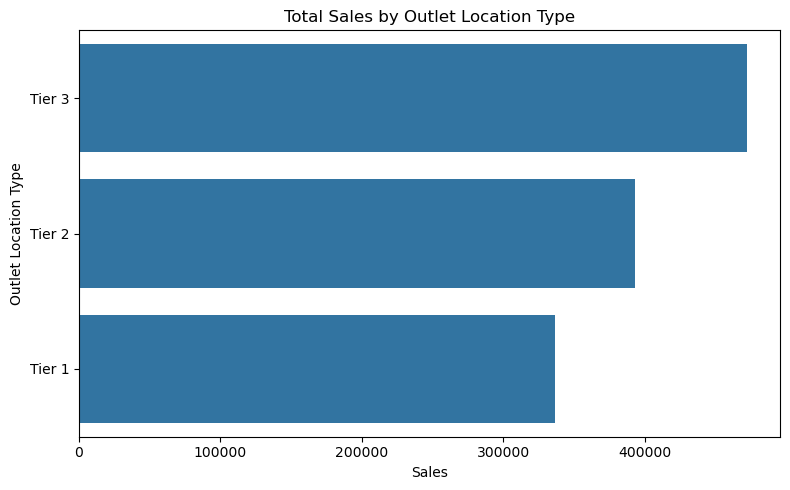

In [194]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x="Sales",y="Outlet Location Type",data=sales_by_location)
plt.title("Total Sales by Outlet Location Type")
plt.xlabel("Sales")
plt.ylabel("Outlet Location Type")
plt.tight_layout()
plt.show()